# Record audio with fs=16KHz, 16bit.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wav
import sounddevice as sd
import torchaudio

In [48]:
file_path = "audio_16.wav"
fs, audio = wav.read(file_path)
print(f"Sample Rate: {fs} Hz")
print(f"Data Type: {audio.dtype}")


# # Play audio
# sd.play(audio, samplerate=fs)
# sd.wait()
# print("Audio playback complete.")

Sample Rate: 16000 Hz
Data Type: int16


In [49]:
from IPython.display import Audio
Audio(audio, rate=fs)

In [50]:
# Convert to float32 for processing
audio = audio.astype(np.float32)

if fs == 16000:
    print("Audio is 16 kHz")
else:
    print("Audio is not 16 kHz")

if audio.dtype == np.int16:
    print("Audio is 16-bit")
else:
    print("Audio is not 16-bit")

Audio is 16 kHz
Audio is not 16-bit


# Write a Python program for computing short term energy

- Frame size = [30msec, 50msec, 100msec, 200msec], Frame shift = Frame size/2
- Use Rectangular window and Hamming window while framing
- Time domain plot of audio
- Plot short term energy v/s time for all frame size, both rect and hamming window.

In [ ]:
def short_term_energy(signal, frame_size, frame_shift, window_type):
    frame_length = int(frame_size * fs)  # Convert msec to samples
    frame_step = int(frame_shift * fs)
    energy = []
    time_axis = []
    
    for i in range(0, len(signal) - frame_length, frame_step):
        frame = signal[i:i + frame_length]
        
        if window_type == 'hamming':
            frame *= np.hamming(frame_length)
        elif window_type == 'rectangular':
            pass  # No modification for rectangular window
        
        energy.append(np.sum(frame ** 2))
        time_axis.append(i / fs)
    
    return time_axis, energy

In [ ]:
frame_sizes = [0.03, 0.05, 0.1, 0.2]  # Convert to seconds
frame_shifts = [size / 2 for size in frame_sizes]

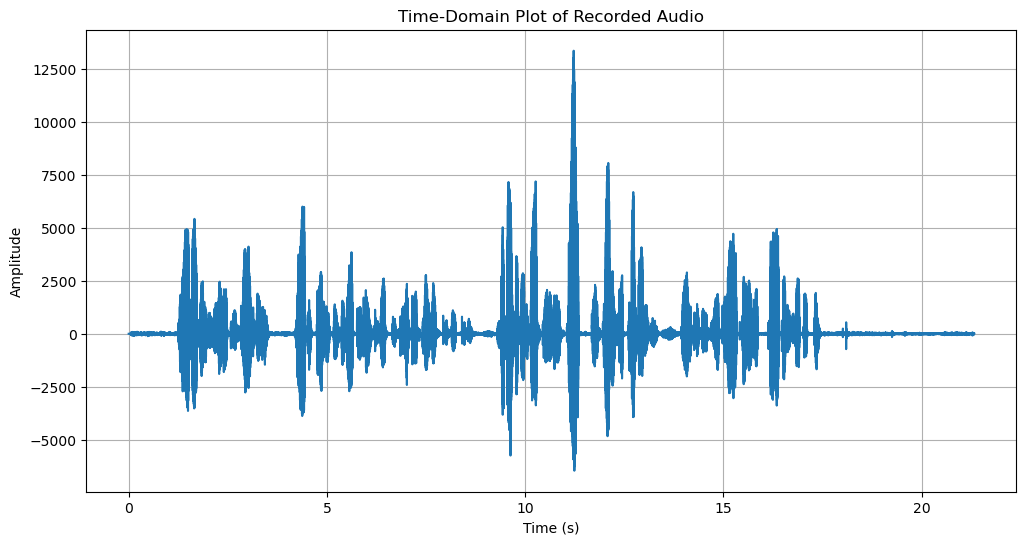

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(audio)) / fs, audio)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Plot of Recorded Audio")
plt.grid()
plt.show()

# Short Term Energy Analysis
- Analyze the amplitude variations of a signal over short durations. 
- Here voiced and unvoiced speech, silence, are being distinguished between different sound events.

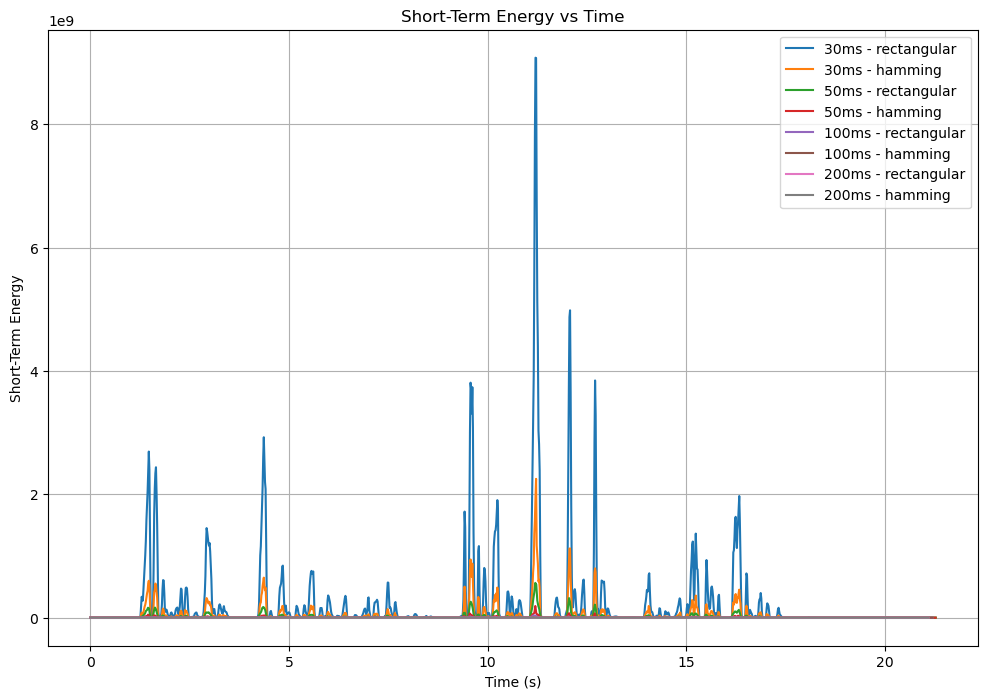

In [ ]:
plt.figure(figsize=(12, 8))
for frame_size, frame_shift in zip(frame_sizes, frame_shifts):
    for window in ['rectangular', 'hamming']:
        t, energy = short_term_energy(audio, frame_size, frame_shift, window)
        plt.plot(t, energy, label=f"{frame_size*1000:.0f}ms - {window}")

plt.xlabel("Time (s)")
plt.ylabel("Short-Term Energy")
plt.title("Short-Term Energy vs Time")
plt.legend()
plt.grid()
plt.show()

# Observations
- Larger frame sizes smooth the energy curve, reducing fine details. Good for general view.
- Rectangular window gives sharper variations, while Hamming smooths transitions.
- Shorter frames capture rapid changes. Good for closer views.

# Short term ZCR [Q2]
Repeat the above experiment by computing short term Zero crossing rate (ZCR). Record observation with different frame size and window type.


- This is in which a signal changes its sign (crosses zero) over a given time frame. 
- It is a key feature in speech processing and audio analysis, commonly used for distinguishing between voiced and unvoiced speech.

In [ ]:
def short_term_zcr(signal, frame_size, frame_shift, window_type):
    frame_length = int(frame_size * fs)
    frame_step = int(frame_shift * fs)
    zcr = []
    time_axis = []
    
    for i in range(0, len(signal) - frame_length, frame_step):
        frame = signal[i:i + frame_length]
        
        if window_type == 'hamming':
            frame = frame * np.hamming(frame_length)
        elif window_type == 'rectangular':
            pass  # No modification for rectangular window
        
        zero_crossings = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
        zcr.append(zero_crossings / frame_length)  # Normalize by frame length
        time_axis.append(i / fs)
    
    return time_axis, zcr

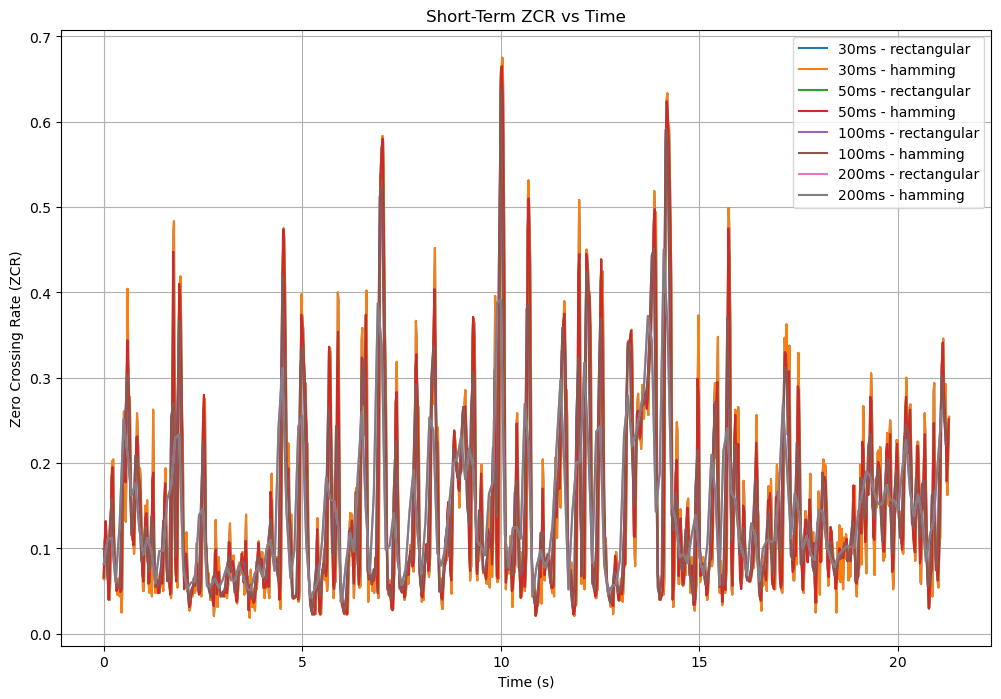

In [ ]:
plt.figure(figsize=(12, 8))
for frame_size, frame_shift in zip(frame_sizes, frame_shifts):
    for window in ['rectangular', 'hamming']:
        t, zcr = short_term_zcr(audio, frame_size, frame_shift, window)
        plt.plot(t, zcr, label=f"{frame_size*1000:.0f}ms - {window}")

plt.xlabel("Time (s)")
plt.ylabel("Zero Crossing Rate (ZCR)")
plt.title("Short-Term ZCR vs Time")
plt.legend()
plt.grid()
plt.show()

## Observations
- Short-term ZCR is higher for unvoiced sounds (fricatives like /sh/) and lower for voiced sounds (vowels like /aa/). Watch for 9-10 secs for sh in shakal and very low for voiced (aaj) in 3sec
- Short-term energy is higher for voiced segments and lower for unvoiced segments.


# Short term Auto correlation [Q3]
- Select 30msec of voiced segment [example: vowels,/aa/ ] from previ- ously recorded audio.
- plot time domain and Autocorrelation of selected speeech segment
- Select 30msec of unvoiced segment [example: Fricatives,/sh/ ] from previously recorded audio.
- Plot time domain and Autocorrelation of selected speeech segment
- Record your observation

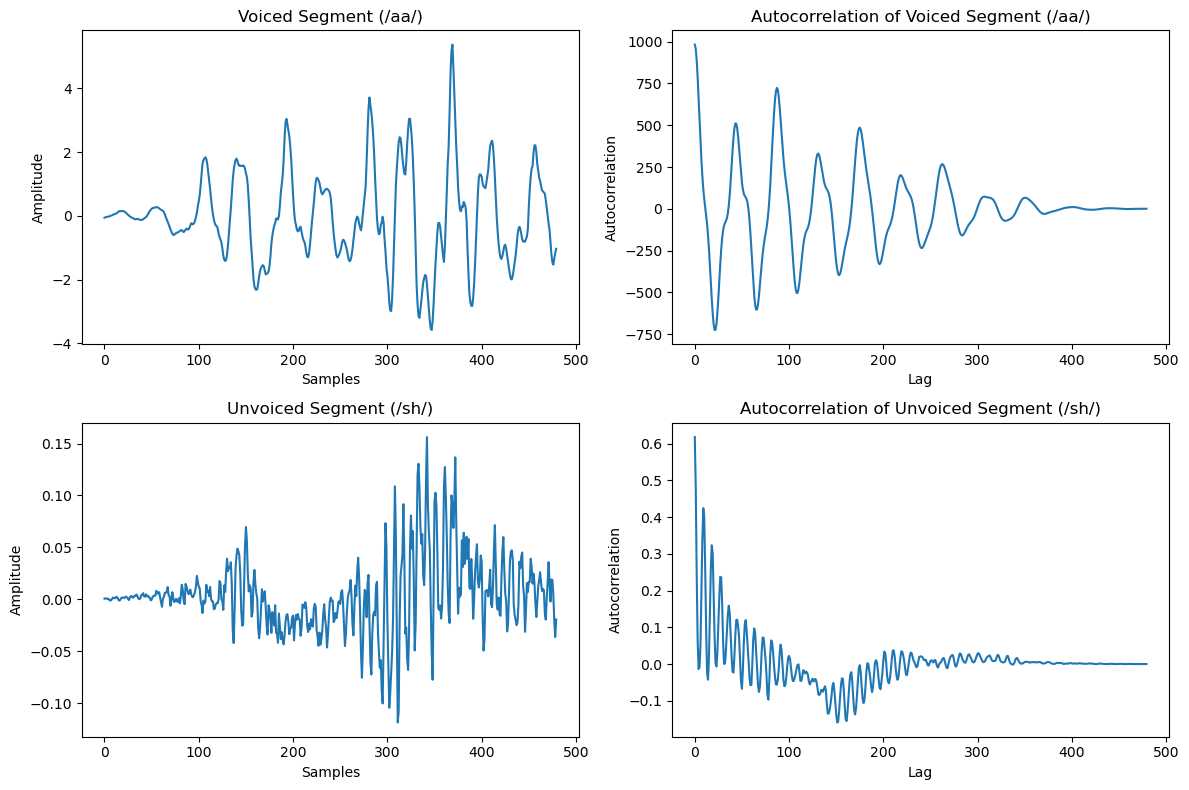

In [ ]:
def compute_autocorrelation(segment):
    autocorr = np.correlate(segment, segment, mode='full')
    return autocorr[len(autocorr) // 2:]


voiced_segment = audio[int(3.0 * fs): int(3.03 * fs)] ## AAJ
unvoiced_segment = audio[int(9.0 * fs): int(9.03 * fs)] ## Shakal

# Compute Autocorrelation
voiced_autocorr = compute_autocorrelation(voiced_segment)
unvoiced_autocorr = compute_autocorrelation(unvoiced_segment)

# Plot time-domain and autocorrelation
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(voiced_segment)
axs[0, 0].set_title("Voiced Segment (/aa/)")
axs[0, 0].set_xlabel("Samples")
axs[0, 0].set_ylabel("Amplitude")

axs[0, 1].plot(voiced_autocorr)
axs[0, 1].set_title("Autocorrelation of Voiced Segment (/aa/)")
axs[0, 1].set_xlabel("Lag")
axs[0, 1].set_ylabel("Autocorrelation")

axs[1, 0].plot(unvoiced_segment)
axs[1, 0].set_title("Unvoiced Segment (/sh/)")
axs[1, 0].set_xlabel("Samples")
axs[1, 0].set_ylabel("Amplitude")

axs[1, 1].plot(unvoiced_autocorr)
axs[1, 1].set_title("Autocorrelation of Unvoiced Segment (/sh/)")
axs[1, 1].set_xlabel("Lag")
axs[1, 1].set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()


- Autocorrelation of voiced sounds shows periodic peaks, indicating harmonic structure.
- Autocorrelation of unvoiced sounds decreases quickly, showing randomness.
